In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import wtools

# Import GSLib/SGeMS

Here we can import any GSLib or SGeMS file as a pandas data frame. Note that if you'd like to restructure this data into a 3D grid that SGeMS uses Fortran ordering and you will have to perfrom a reshape using the grid exentents. Luckily, if you know your grid's extents you could pass the table to `tableToGrid()` with your extents to make an XYZ grid!

In [3]:
wl = wtools.readGSLib('data/a_wlrefcleaned.sgems')
print(wl.header)
wl.head()

Walker Lake (260x300x1)


,Utrans
0,0.526667
1,0.526667
2,0.526667
3,0.526667
4,0.526667


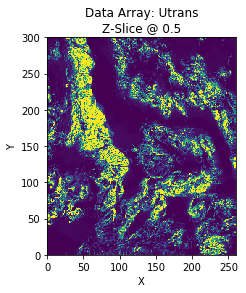

In [4]:
wlg = wtools.Grid.tableToGrid(wl, (260, 300, 1))
wlg.display(plt, 'Utrans', vmin=0, vmax=1000)

In [5]:
wlg.saveUBC('output/walker')

## Load SGeMS Grids

If your data file already has the grid extents in the header line of your file as 3 seperated integers, then you can use `readSGeMSGrid()` to directly load up an XYZ grid of your data.

In [6]:
top = wtools.Grid.readSGeMSGrid('data/topexample.sgems')
top

<Grid instance at 4419343864>
  Shape: (150, 200, 20)
  Origin: (0.0, 0.0, 0.0)
  X Bounds: (0.0, 150.0)
  Y Bounds: (0.0, 200.0)
  Z Bounds: (0.0, 20.0)
  Models: (3)
    'av' (float64): (1.906e-01, 9.092e-01)
    'r' (float64): (-7.526e-01, 7.158e-01)
    'z' (float64): (-5.753e-02, 1.157e+00)

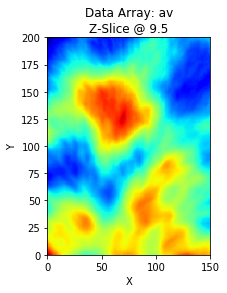

In [7]:
top.display(plt, 'av', plane='xy', cmap='jet')

In [8]:
top.saveUBC('output/topexample')

In [9]:
load = wtools.Grid.readUBC('output/topexample')
top.equal(load)

True